In [1]:
from pathlib import Path
from Trainer import Trainer
import os
import seaborn as sns
import umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
model_path = Path("/") / "thunderdisk" / "data_rene_policistico_log" / "2021-08-04 11:36:30" / "90.pth"
trainer = Trainer(model_path, feature_extraction=True)
features_t, labels_t = trainer.extract_features(trainer.train_dl)
features_v, labels_v = trainer.extract_features(trainer.valid_dl)

galaxy_map = trainer.train_ds.galaxy_names
# Map int to galaxy name
named_labels_t = [galaxy_map[i] for i in labels_t]
named_labels_v = [galaxy_map[i] for i in labels_v]

palette = sns.color_palette("bright")
def show_plot(data, type):
    hue = named_labels_t if type == "t" else named_labels_v
    plt.figure(figsize=(10, 10), dpi=80)
    sns.scatterplot(data[:, 0], data[:, 1], palette=palette, hue=hue, legend="full")
    plt.show()

Using pre-trained weights
Dataset train of 9896 images loaded
Dataset validation of 2519 images loaded


100%|██████████| 40/40 [00:31<00:00,  1.25it/s]


# UMAP

In [2]:
umap_t = umap.UMAP().fit_transform(features_t)
print(features_t.shape, "->", umap_t.shape)
umap_v = umap.UMAP().fit_transform(features_v)
print(features_v.shape, "->", umap_v.shape)

(9896, 32768) -> (9896, 2)
(2519, 32768) -> (2519, 2)


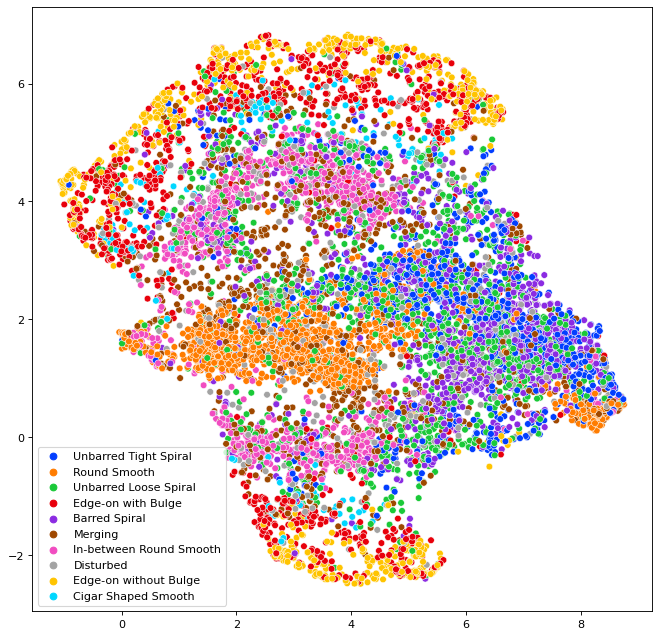

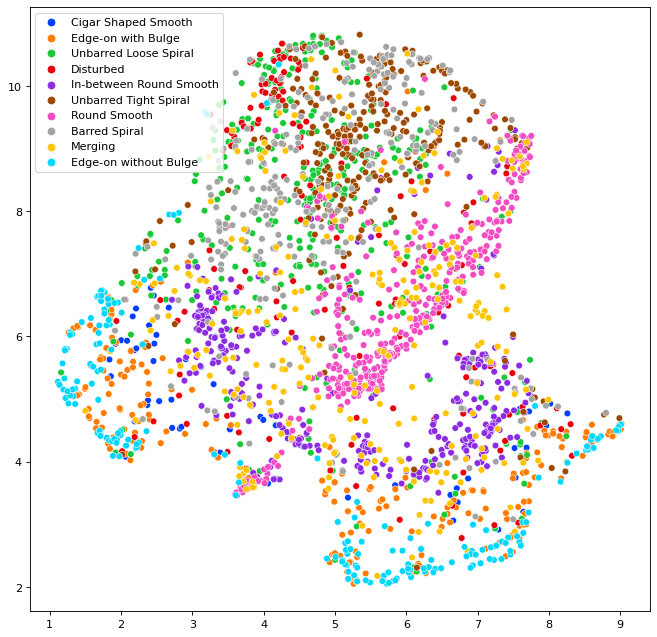

In [3]:
show_plot(umap_t, "t")
show_plot(umap_v, "v")

# TSNE

In [4]:
tsne_t = TSNE(n_components=2).fit_transform(features_t)
print(features_t.shape, "->", tsne_t.shape)
tsne_v = TSNE(n_components=2).fit_transform(features_v)
print(features_v.shape, "->", tsne_v.shape)

(9896, 32768) -> (9896, 2)
(2519, 32768) -> (2519, 2)


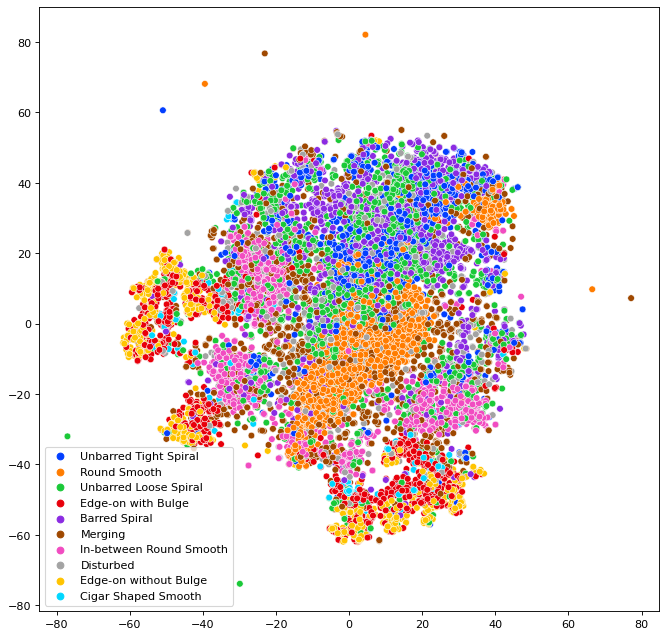

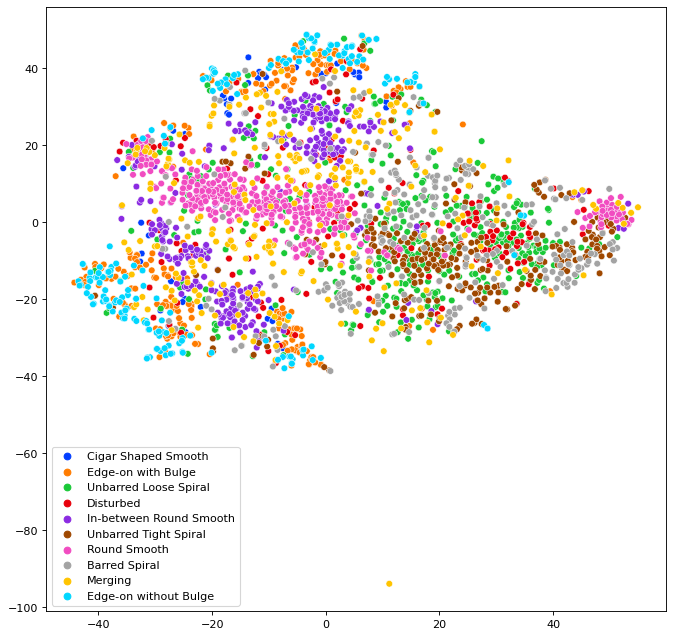

In [5]:
show_plot(tsne_t, "t")
show_plot(tsne_v, "v")

# PCA

In [6]:
pca_t = PCA(n_components=2).fit_transform(features_t)
print(features_t.shape, "->", tsne_t.shape)
pca_v = PCA(n_components=2).fit_transform(features_v)
print(features_v.shape, "->", tsne_v.shape)

(9896, 32768) -> (9896, 2)
(2519, 32768) -> (2519, 2)


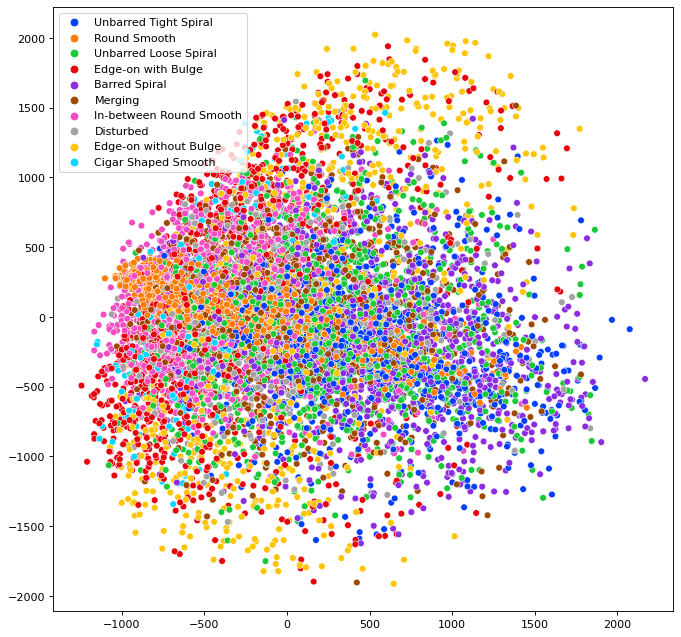

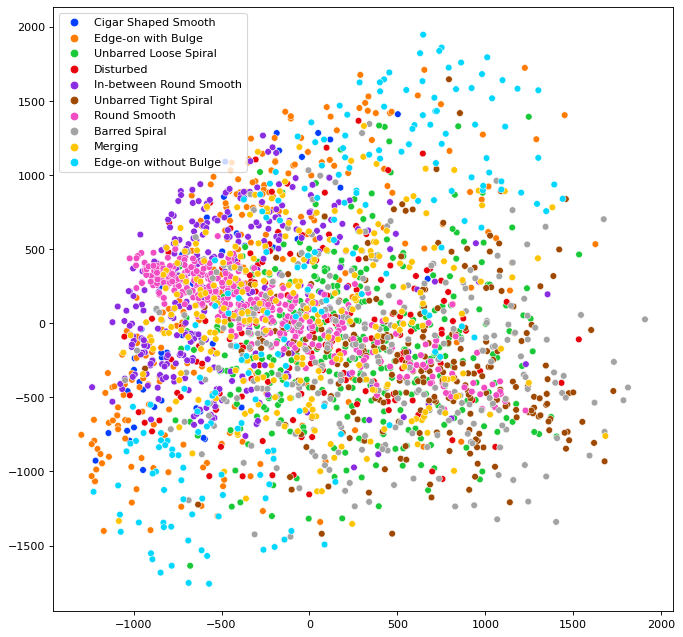

In [7]:
show_plot(pca_t, "t")
show_plot(pca_v, "v")